In [3]:
import umap.umap_ as umap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import random
from sklearn.discriminant_analysis import StandardScaler
import os
from sklearn.linear_model import LinearRegression

In [4]:
def gimme_traffic_data():
    traffic_data = pd.read_csv('TRUE_DATA.csv')
    traffic_data['Direction'] = traffic_data['Direction'].map(lambda x: 1 if x == 'P' else 0)
    traffic_data['Vehicles'] = traffic_data['Vehicles'].map(lambda x: 0 if np.isnan(x) else x)
    traffic_data['Driver Age'] = traffic_data['Driver Age'].map(lambda x: 0 if np.isnan(x) else x)
    traffic_data['Condition_Code'] = traffic_data['Condition_Code'].map(lambda x: x + 1)
    traffic_data['Condition_Code'] = traffic_data['Condition_Code'].map(lambda x: 0 if np.isnan(x) else x)
    traffic_data['MorF'] = traffic_data['MorF'].map(lambda x: 0 if np.isnan(x) else x + 1)
    traffic_data['Date'] = pd.to_datetime(traffic_data['Date'])
    traffic_data['DayOfWeek'] = traffic_data['Date'].dt.dayofweek + 1
    traffic_data['Date'] = traffic_data['Date'].dt.strftime('%Y%m%d').astype('Int64')
    return traffic_data
traffic_data = gimme_traffic_data()
traffic_data.head()

embedded_data = pd.read_csv('EMBEDDED_TRAFFIC_DATA_2.csv')
embedded_data = embedded_data.iloc[:, 1:]
help_data = embedded_data.to_numpy()
help_data

array([[-5.2337017 ,  3.1066887 ],
       [-5.097139  , -3.3164    ],
       [-5.231977  ,  3.0993211 ],
       ...,
       [12.219655  , -1.5696431 ],
       [-0.40568995,  2.263978  ],
       [ 4.9134336 , -9.503845  ]])

In [20]:
working_data = traffic_data.to_numpy()
working_data = working_data.astype(float)
working_data = np.nan_to_num(working_data, nan=0.0)

C:\Users\wsach\AppData\Local\Temp\ipykernel_17072\3787092745.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedded_data_bp[:,0], embedded_data_bp[:, 1], cmap="Spectral")


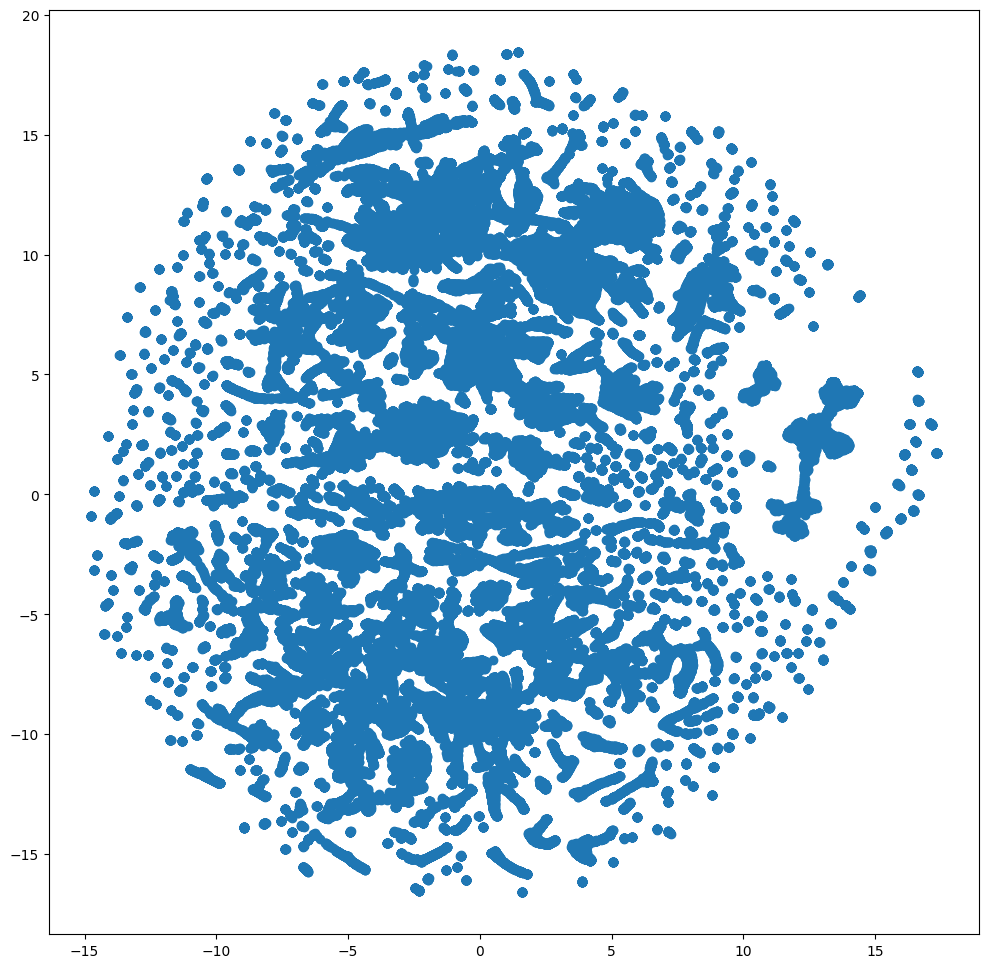

In [60]:
reducer = umap.UMAP()
umap_data = working_data
scaler = StandardScaler()
scaled_umap_data = scaler.fit_transform(umap_data)
embedded_data_bp = reducer.fit_transform(scaled_umap_data)

fig = plt.figure(figsize=(12,12))
plt.scatter(embedded_data_bp[:,0], embedded_data_bp[:, 1], cmap="Spectral")
plt.show()

In [7]:
pandas_embed = pd.DataFrame(embedded_data_bp)
pandas_embed.to_csv('EMBEDDED_TRAFFIC_DATA_2.csv')

NameError: name 'embedded_data_bp' is not defined

In [9]:
def radial_log_transform(data, alpha=1.0):
    x, y = data[:, 0], data[:, 1]
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    r_transformed = np.log1p(alpha * r)
    x_new = r_transformed * np.cos(theta)
    y_new = r_transformed * np.sin(theta)
    return np.column_stack((x_new, y_new))
log_data = radial_log_transform(help_data, alpha=-0.5)

C:\Users\wsach\AppData\Local\Temp\ipykernel_7472\1694588913.py:5: RuntimeWarning: invalid value encountered in log1p
  r_transformed = np.log1p(alpha * r)


C:\Users\wsach\AppData\Local\Temp\ipykernel_7472\3422189217.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(log_data[:,0], log_data[:, 1], cmap="Spectral", s=0.1)


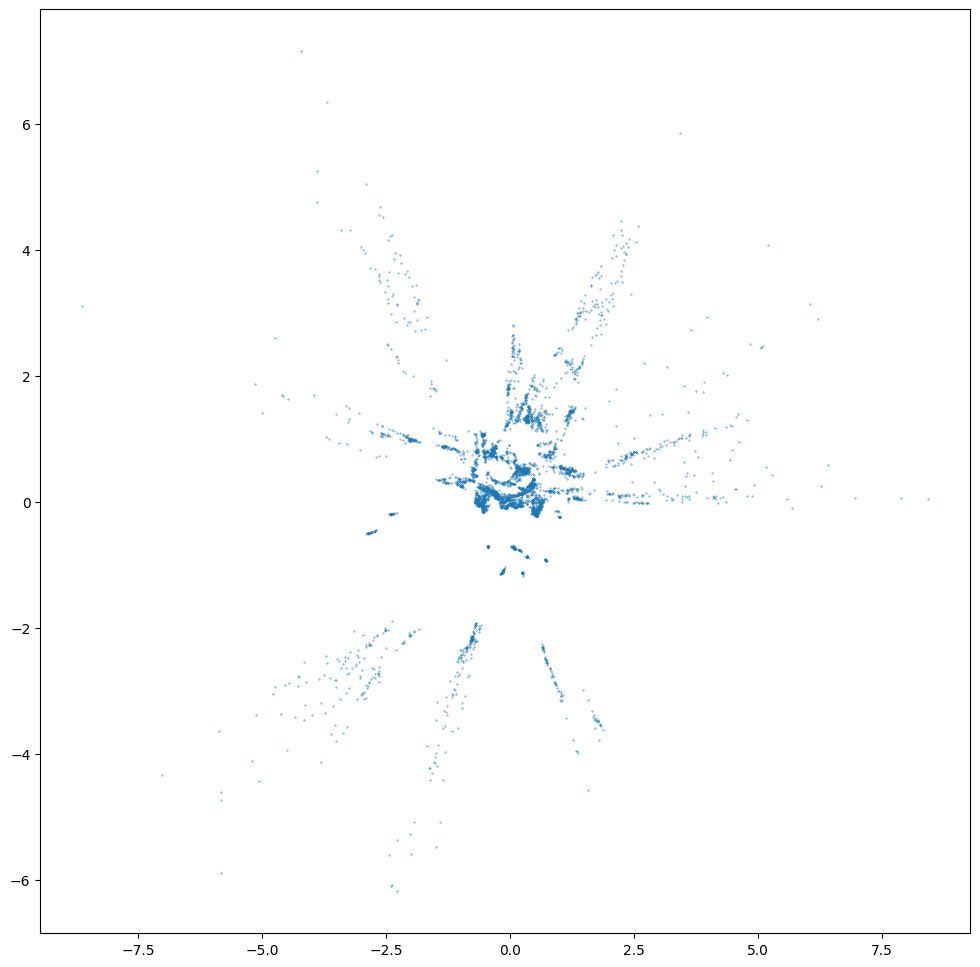

In [11]:
fig = plt.figure(figsize=(12,12))
plt.scatter(log_data[:,0], log_data[:, 1], cmap="Spectral", s=0.1)
plt.show()

C:\Users\wsach\AppData\Local\Temp\ipykernel_17072\1356412719.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedded_data_bp[:,0], embedded_data_bp[:, 1], cmap="Spectral", s=0.1)


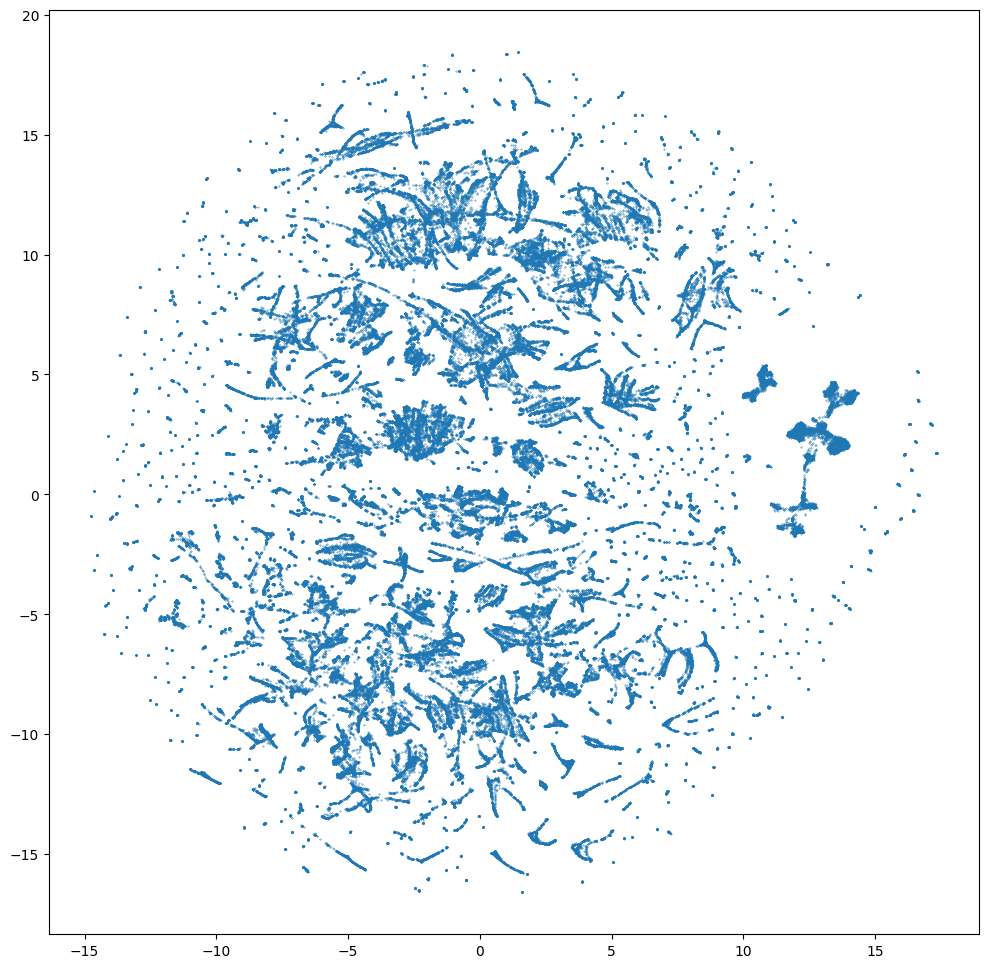

In [80]:
fig = plt.figure(figsize=(12,12))
plt.scatter(embedded_data_bp[:,0], embedded_data_bp[:, 1], cmap="Spectral", s=0.1)
plt.show()

In [ ]:
from sklearn_som.som import SOM

array([[-5.2337017 ,  3.1066887 ],
       [-5.097139  , -3.3164    ],
       [-5.231977  ,  3.0993211 ],
       ...,
       [12.219655  , -1.5696431 ],
       [-0.40568995,  2.263978  ],
       [ 4.9134336 , -9.503845  ]], dtype=float32)

In [91]:
som_data = SOM(m=15, n=1, dim=2)
som_data.fit(log_data)
predictions_log = som_data.predict(log_data)

som_data = SOM(m=15, n=1, dim=2)
som_data.fit(embedded_data_bp)
predictions_norm = som_data.predict(embedded_data_bp)

In [95]:
log_data[:,1]

array([ 0.71309601, -0.76153494,  0.71168759, ..., -0.25079954,
        0.75347541, -1.64191366])

Text(0.5, 1.0, 'SELF ORGANIZING MAP NORMAL')

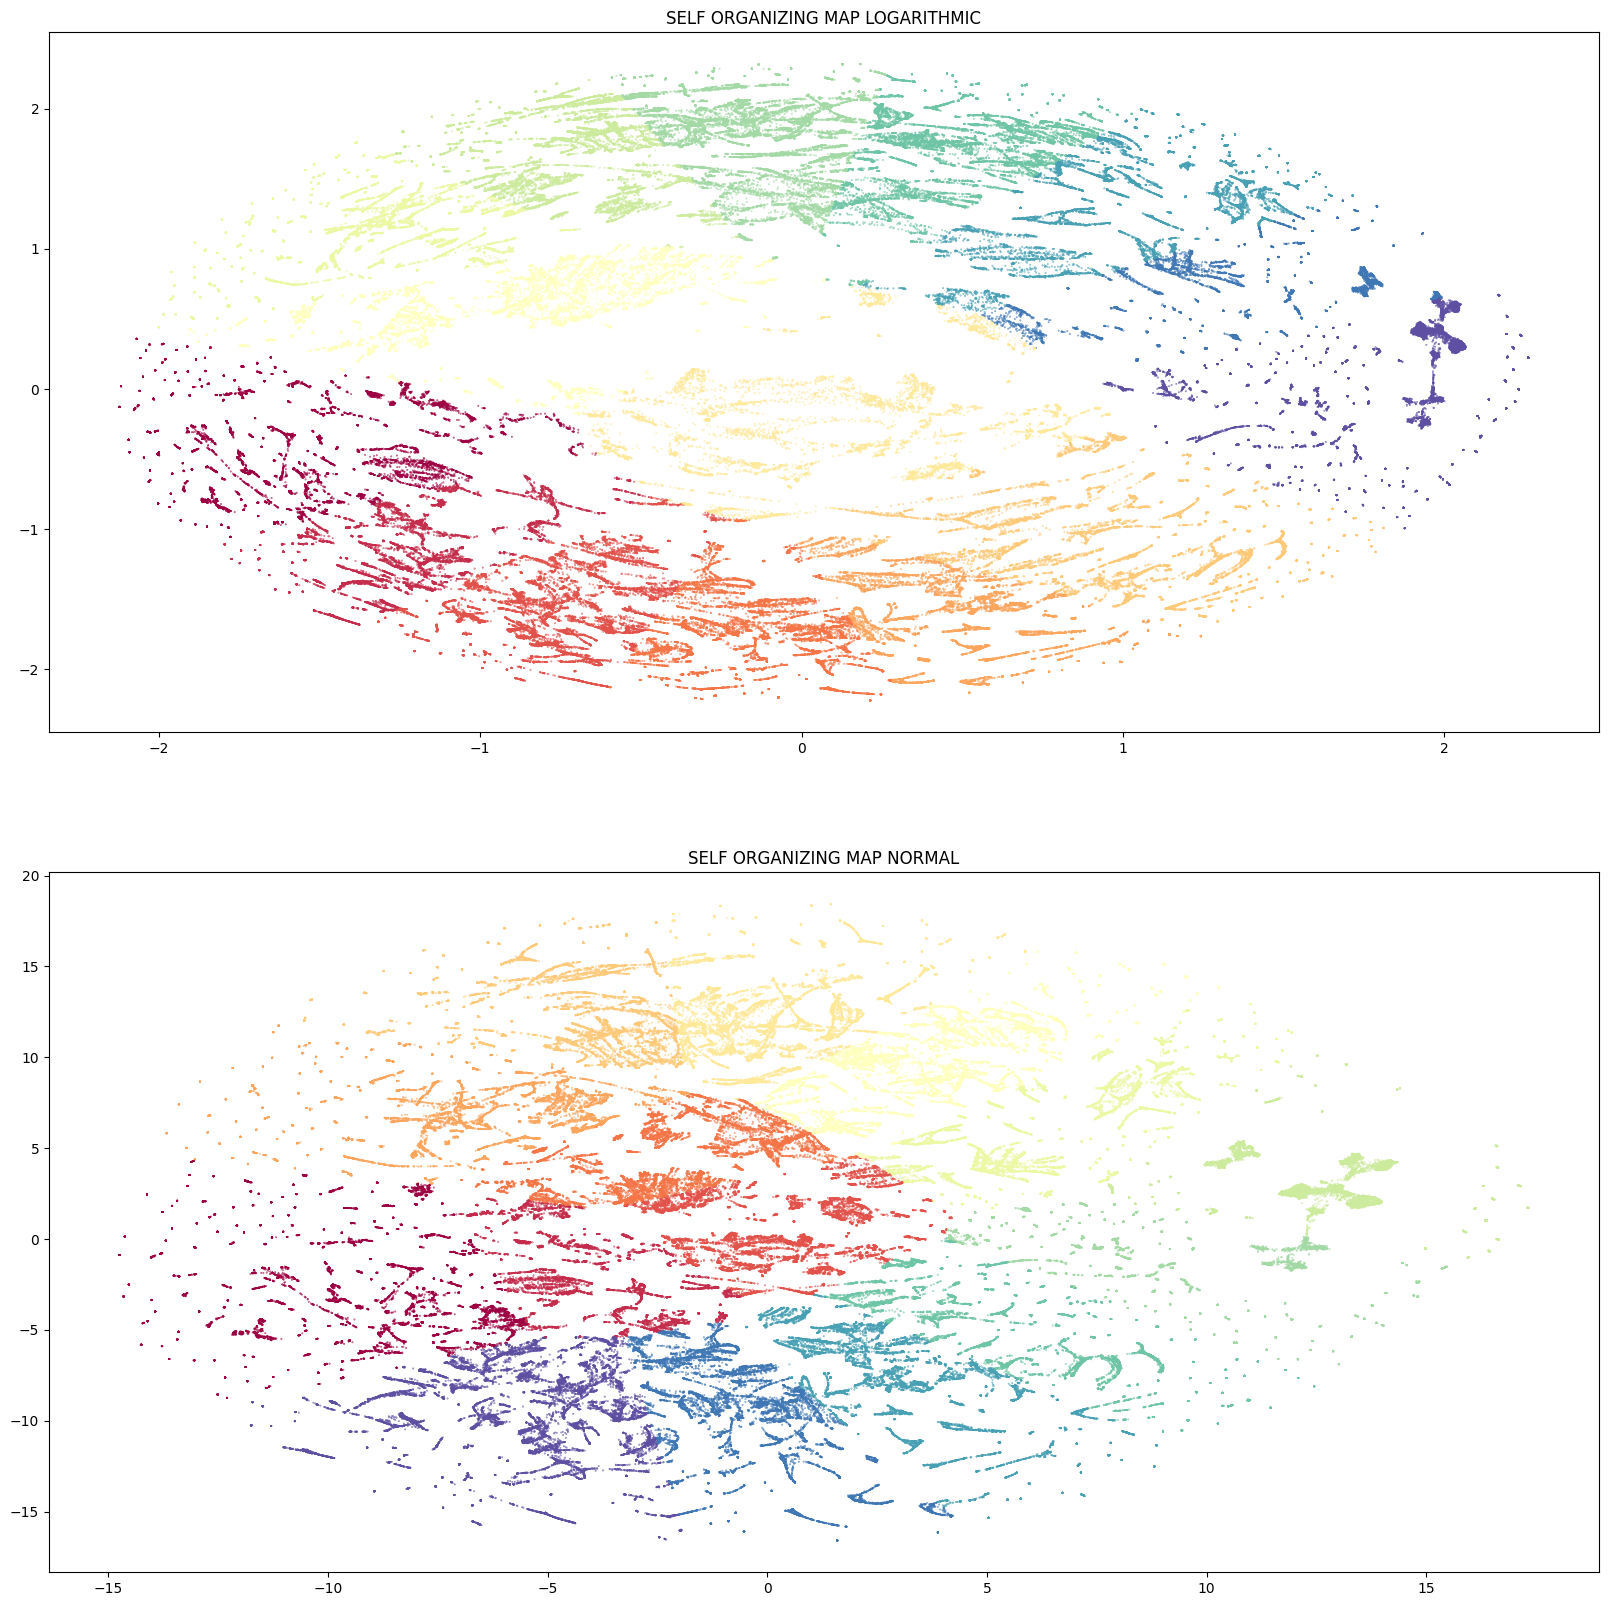

In [98]:
fig, ax = plt.subplots(2,1, figsize=(20,20))

ax[0].scatter(log_data[:,0], log_data[:,1], c=predictions_log, cmap="Spectral", s=0.1)
ax[0].set_title("SELF ORGANIZING MAP LOGARITHMIC")

ax[1].scatter(embedded_data_bp[:,0], embedded_data_bp[:,1], c=predictions_norm, cmap="Spectral", s=0.1)
ax[1].set_title("SELF ORGANIZING MAP NORMAL")

In [5]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering

DBSCAN_data_log = DBSCAN(eps=0.1,min_samples = 20)
DBSCAN_data_log.fit(log_data)
predictions_log_DBSCAN = DBSCAN_data_log.labels_

DBSCAN_data_norm = DBSCAN(eps=0.1,min_samples = 20)
DBSCAN_data_norm.fit(embedded_data)
predictions_norm_DBSCAN = DBSCAN_data_norm.labels_


# AC_data_log = AgglomerativeClustering(n_clusters=20, metric='euclidean', linkage='ward')
# AC_data_log.fit(log_data)
# predictions_log_AC = AC_data_log.labels_

# AC_data_norm = AgglomerativeClustering(n_clusters=20, metric='euclidean', linkage='ward')
# AC_data_norm.fit(embedded_data_bp)
# predictions_norm_AC = AC_data_norm.labels_

In [11]:
embed_data = embedded_data.to_numpy()
embed_data

array([[-5.2337017 ,  3.1066887 ],
       [-5.097139  , -3.3164    ],
       [-5.231977  ,  3.0993211 ],
       ...,
       [12.219655  , -1.5696431 ],
       [-0.40568995,  2.263978  ],
       [ 4.9134336 , -9.503845  ]])

Text(0.5, 1.0, 'DBSCAN NORMAL')

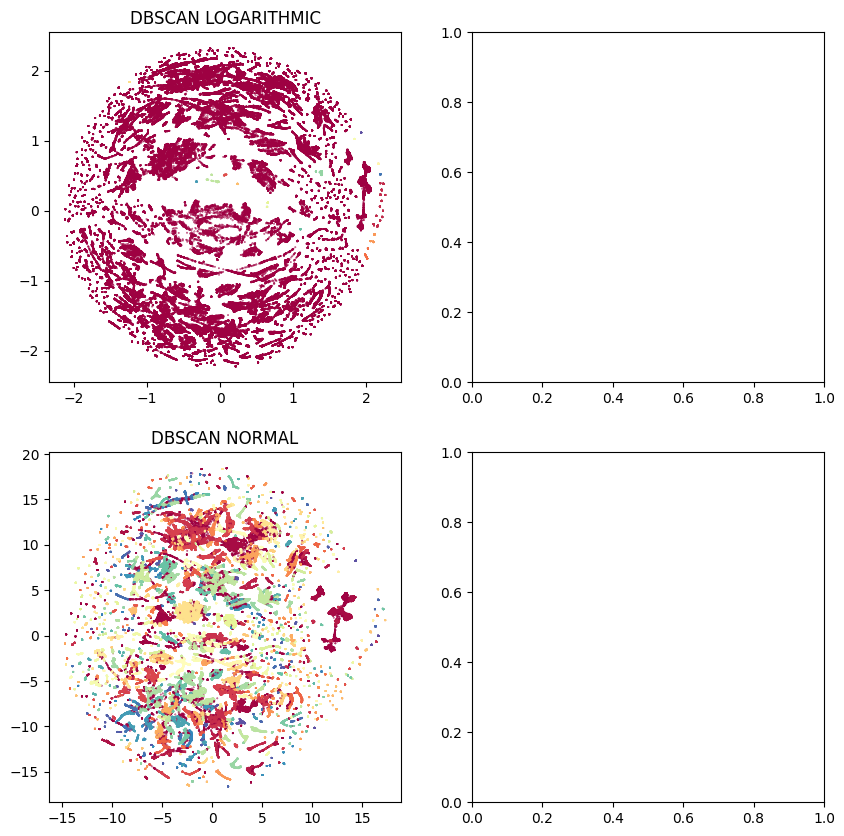

In [12]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

ax[0,0].scatter(log_data[:,0], log_data[:,1], c=predictions_log_DBSCAN, cmap="Spectral", s=0.1)
ax[0,0].set_title("DBSCAN LOGARITHMIC")

ax[1,0].scatter(embed_data[:,0], embed_data[:,1], c=predictions_norm_DBSCAN, cmap="Spectral", s=0.1)
ax[1,0].set_title("DBSCAN NORMAL")

# ax[0,1].scatter(log_data[:,0], log_data[:,1], c=predictions_log, cmap="Spectral", s=0.1)
# ax[0,1].set_title("SELF ORGANIZING MAP LOGARITHMIC")

# ax[1,1].scatter(embedded_data_bp[:,0], embedded_data_bp[:,1], c=predictions_norm, cmap="Spectral", s=0.1)
# ax[1,1].set_title("SELF ORGANIZING MAP NORMAL")

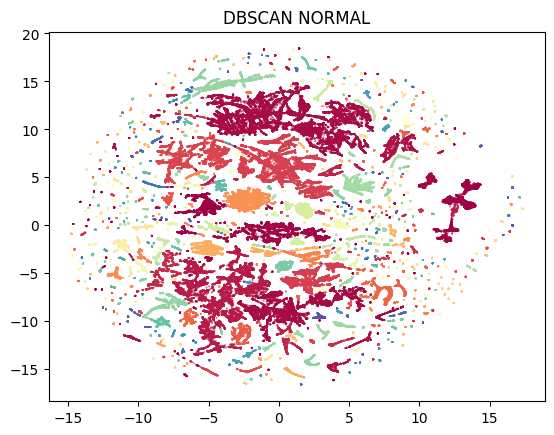

In [16]:
DBSCAN_data_norm = DBSCAN(eps=0.2,min_samples = 20)
DBSCAN_data_norm.fit(embed_data)
predictions_norm_DBSCAN = DBSCAN_data_norm.labels_

plt.Figure(figsize=(100,100))
plt.scatter(embed_data[:,0], embed_data[:,1], c=predictions_norm_DBSCAN, cmap="Spectral", s=0.1)
plt.title("DBSCAN NORMAL")
plt.show()

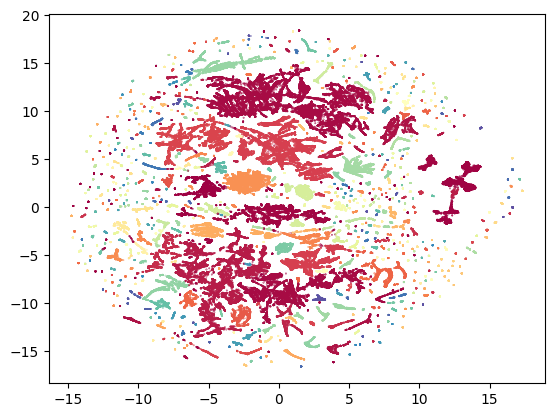

In [17]:
fig, ax = plt.subplots()
sc = ax.scatter(embed_data[:, 0], embed_data[:, 1], c=predictions_norm_DBSCAN, cmap="Spectral", s=0.1)

annot = ax.annotate("", xy=(0,0), xytext=(20,20), textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):
    idx = ind["ind"][0]
    pos = embed_data[idx]
    annot.xy = pos
    # Customize this to show relevant info from base_data
    annot.set_text(f"Index: {idx}\nBase: {working_data[idx]}")
    annot.get_bbox_patch().set_facecolor("lightyellow")
    annot.get_bbox_patch().set_alpha(0.9)

def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        elif vis:
            annot.set_visible(False)
            fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)
plt.show()

In [20]:
predict_norm_db_df = pd.DataFrame(predictions_norm_DBSCAN)
predict_norm_db_df.to_csv('PREDICT_NORM_DBSCAN.csv', index=False)

In [21]:
max(predictions_norm_DBSCAN)

689

In [38]:
from collections import Counter

working_data = gimme_traffic_data()

working_data['cluster'] = predictions_norm_DBSCAN

data_embed = pd.DataFrame(embed_data)
data_embed['cluster'] = predictions_norm_DBSCAN

# Count cluster sizes
cluster_counts = Counter(predictions_norm_DBSCAN)

# Loop through clusters
for cluster_id, count in cluster_counts.items():
    if cluster_id == -1:
        continue
    if count >= 500:
        cluster_df = working_data[working_data['cluster'] == cluster_id].drop(columns=['cluster'])
        data_embed_cluster = data_embed[data_embed['cluster'] == cluster_id].drop(columns=['cluster'])
        np_embed = data_embed_cluster.to_numpy()
        
        
        filename = f"clusters/cluster_{cluster_id}.csv"
        cluster_df.to_csv(filename, index=False)
        
        plt.figure(figsize=(20, 20))
        plt.scatter(np_embed[:,0], np_embed[:,1], s=10, alpha=0.7)
        plt.title(f"Cluster {cluster_id} (n={count})")
        plt.xlabel("x")
        plt.ylabel("y")

        # Save as PNG
        filename = f"cluster_png/cluster_{cluster_id}.png"
        plt.savefig(filename, dpi=150, bbox_inches="tight")
        plt.close()

In [ ]:
for filename in os.listdir('clusters'):
    file_path = os.path.join('clusters', filename)
    df = pd.read_csv(file_path)
    df = df.drop(columns={'Date'})
    stat = df.describe().to_string()
    output_file = os.path.join('cluster_stats', f"{filename}_stats.txt")
    with open(output_file, 'w') as f:
        f.write(f"Statistics for {filename}:\n")
        f.write(stat)
        f.write("\n\n")

In [23]:
help_data

array([[-5.2337017 ,  3.1066887 ],
       [-5.097139  , -3.3164    ],
       [-5.231977  ,  3.0993211 ],
       ...,
       [12.219655  , -1.5696431 ],
       [-0.40568995,  2.263978  ],
       [ 4.9134336 , -9.503845  ]])

In [24]:
traffic_data

Date  Direction  Time  TRAFFIC  PRCP  SNOW  SNWD  SNOW_DAY_SUM  \
0       20140101          1     0      102  0.12   1.9  13.0           1.9   
1       20140101          0     0      131  0.12   1.9  13.0           1.9   
2       20140101          1     1       91  0.12   1.9  13.0           1.9   
3       20140101          0     1      162  0.12   1.9  13.0           1.9   
4       20140101          1     2       86  0.12   1.9  13.0           1.9   
...          ...        ...   ...      ...   ...   ...   ...           ...   
167291  20241231          0    21      316  0.00   0.0  15.0           8.5   
167292  20241231          1    22      281  0.00   0.0  15.0           8.5   
167293  20241231          0    22      233  0.00   0.0  15.0           8.5   
167294  20241231          1    23      201  0.00   0.0  15.0           8.5   
167295  20241231          0    23      157  0.00   0.0  15.0           8.5   

        Vehicles  Driver Age  Condition_Code  MorF  DayOfWeek  
0            0.0         0.0             0.0   0.0          3  
1            0.0         0.0             0.0   0.0          3  
2            0.0         0.0             0.0   0.0          3  
3            0.0         0.0             0.0   0.0          3  
4            1.0        26.0             1.0   1.0          3  
...          ...         ...             ...   ...        ...  
167291       0.0         0.0             0.0   0.0          2  
167292       1.0        19.0             7.0   1.0          2  
167293       1.0        19.0             7.0   1.0          2  
167294       0.0         0.0             0.0   0.0          2  
167295       0.0         0.0             0.0   0.0          2  

[167296 rows x 13 columns]

Text(0, 0.5, 'y')

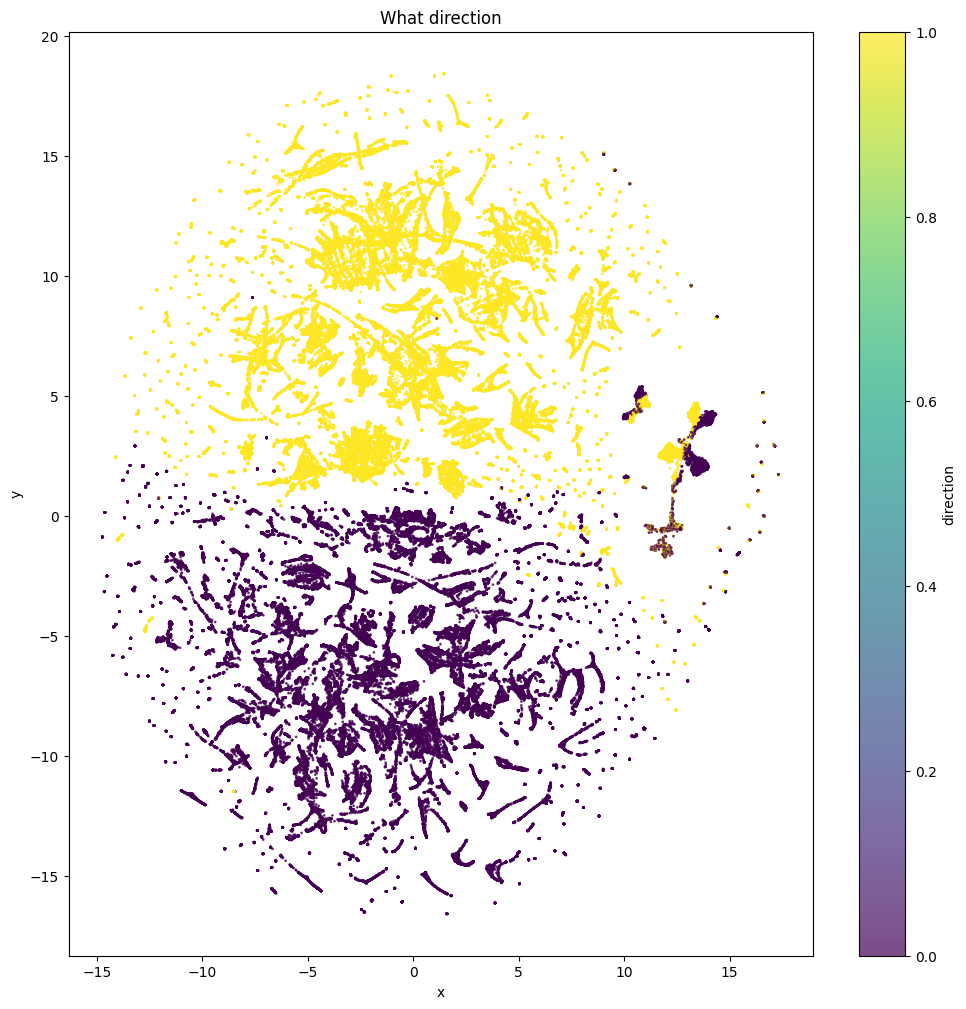

In [39]:
what_direction = traffic_data['Direction']
plt.figure(figsize=(12,12))
scatter_dir = plt.scatter(help_data[:,0], help_data[:,1],c=what_direction, s=1, alpha=0.7)
plt.colorbar(scatter_dir, label='direction')
plt.title(f"What direction")
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

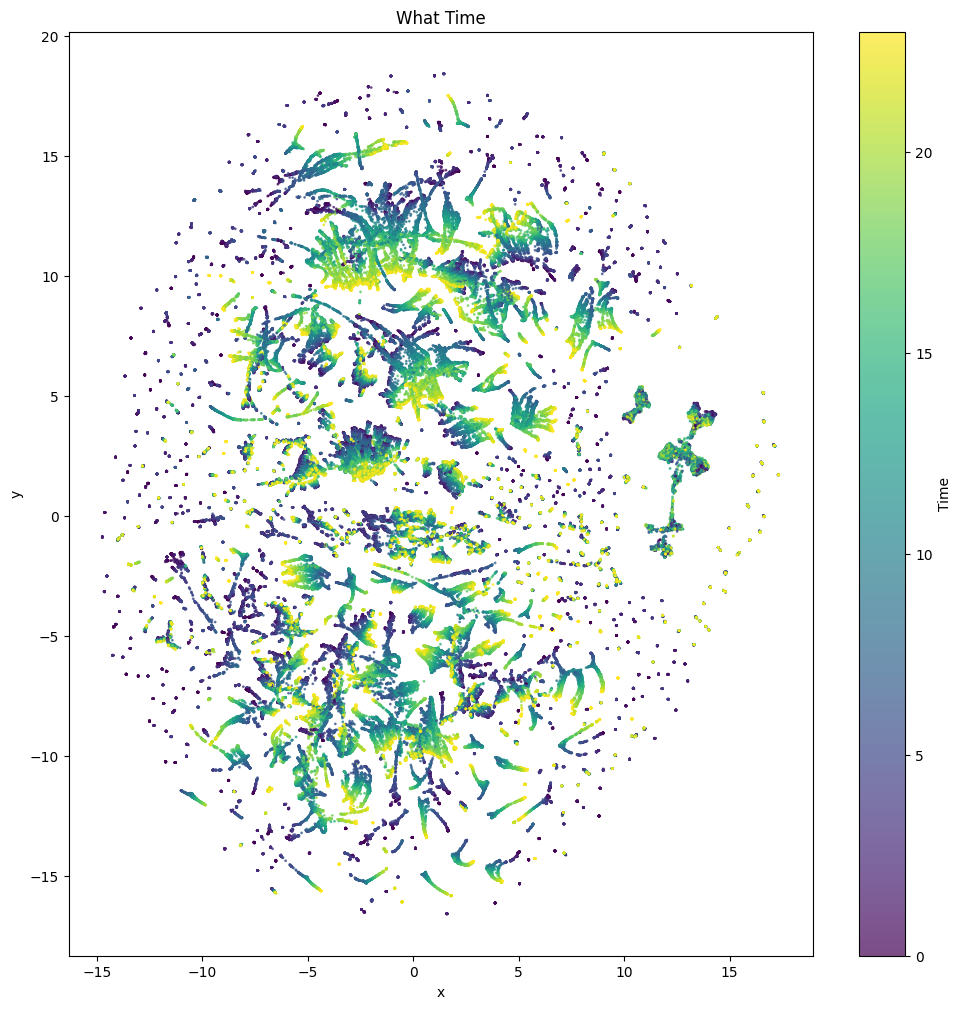

In [40]:
what_time = traffic_data['Time']

plt.figure(figsize=(12,12))
scatter_time = plt.scatter(help_data[:, 0], help_data[:, 1], c=what_time, s=1, alpha=0.7)
plt.colorbar(scatter_time, label='Time')
plt.title(f"What Time")
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

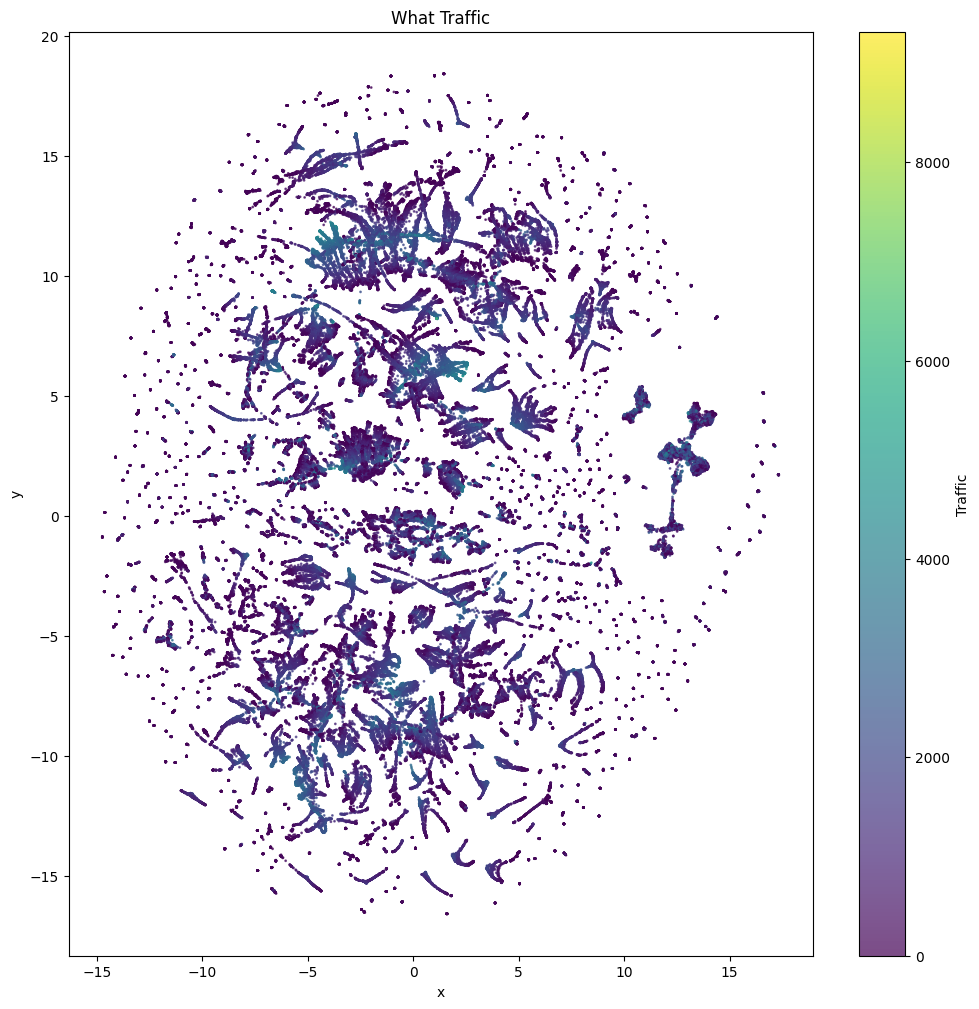

In [41]:
what_traffic = traffic_data['TRAFFIC']

plt.figure(figsize=(12,12))
scatter_traffic = plt.scatter(help_data[:,0], help_data[:,1],c=what_traffic, s=1, alpha=0.7)
plt.colorbar(scatter_traffic, label='Traffic')
plt.title(f"What Traffic")
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

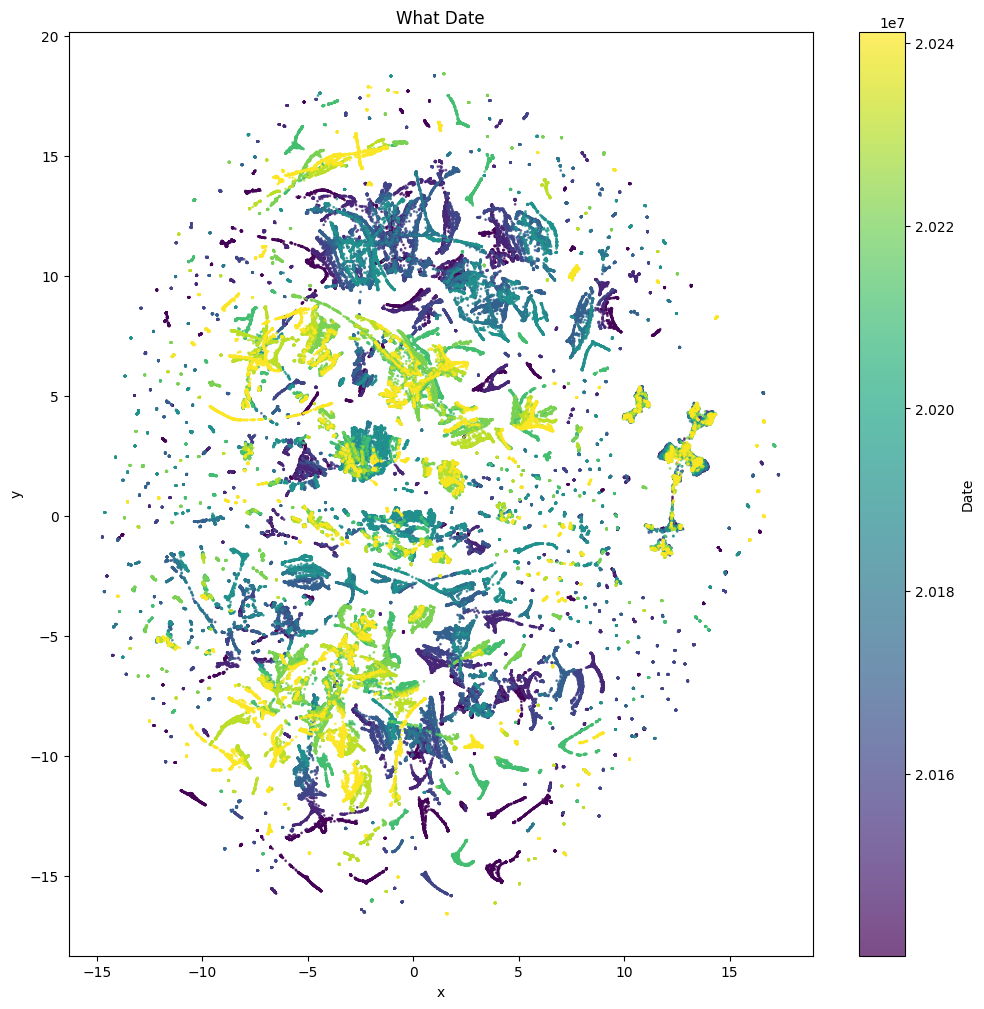

In [42]:
what_date = traffic_data['Date']

plt.figure(figsize=(12,12))
scatter_date = plt.scatter(help_data[:,0], help_data[:,1],c=what_date, s=1, alpha=0.7)
plt.colorbar(scatter_date, label='Date')
plt.title(f"What Date")
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

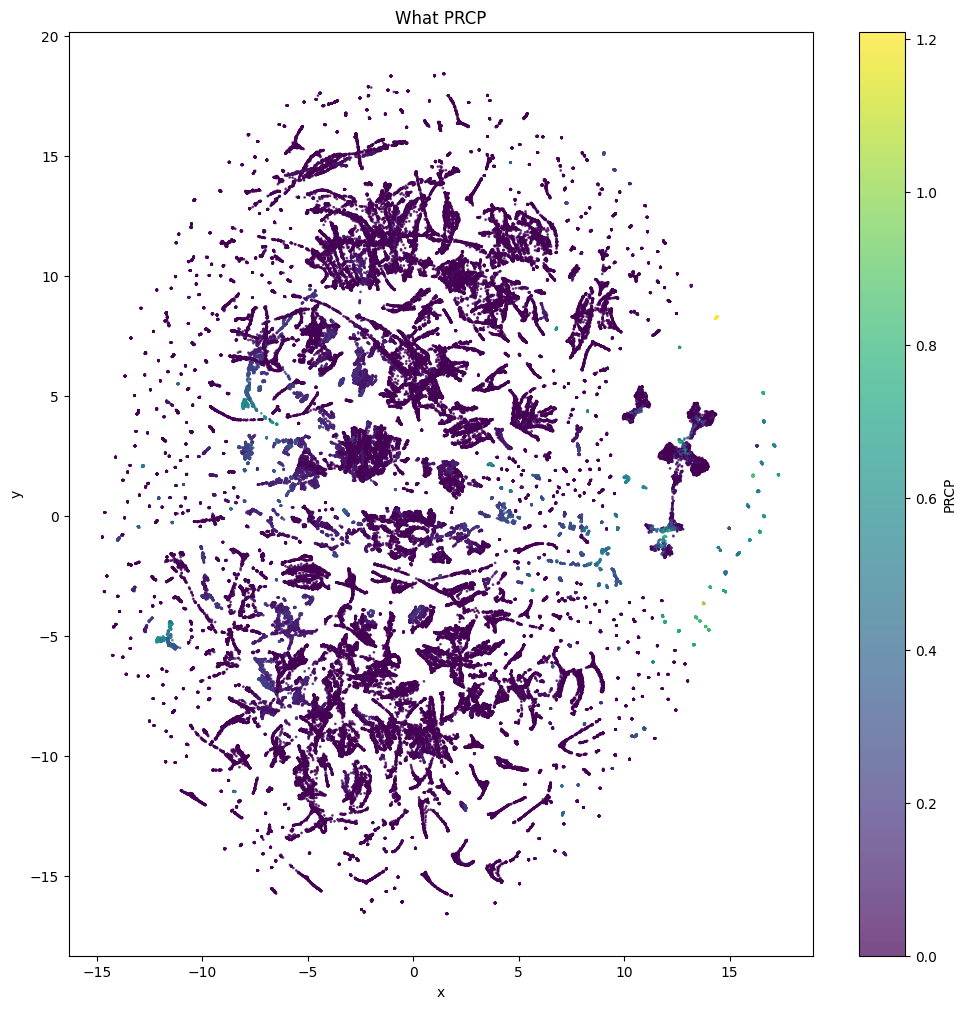

In [43]:
what_PRCP = traffic_data['PRCP']

plt.figure(figsize=(12,12))
scatter_PRCP = plt.scatter(help_data[:,0], help_data[:,1],c=what_PRCP, s=1, alpha=0.7)
plt.colorbar(scatter_PRCP, label='PRCP')
plt.title(f"What PRCP")
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

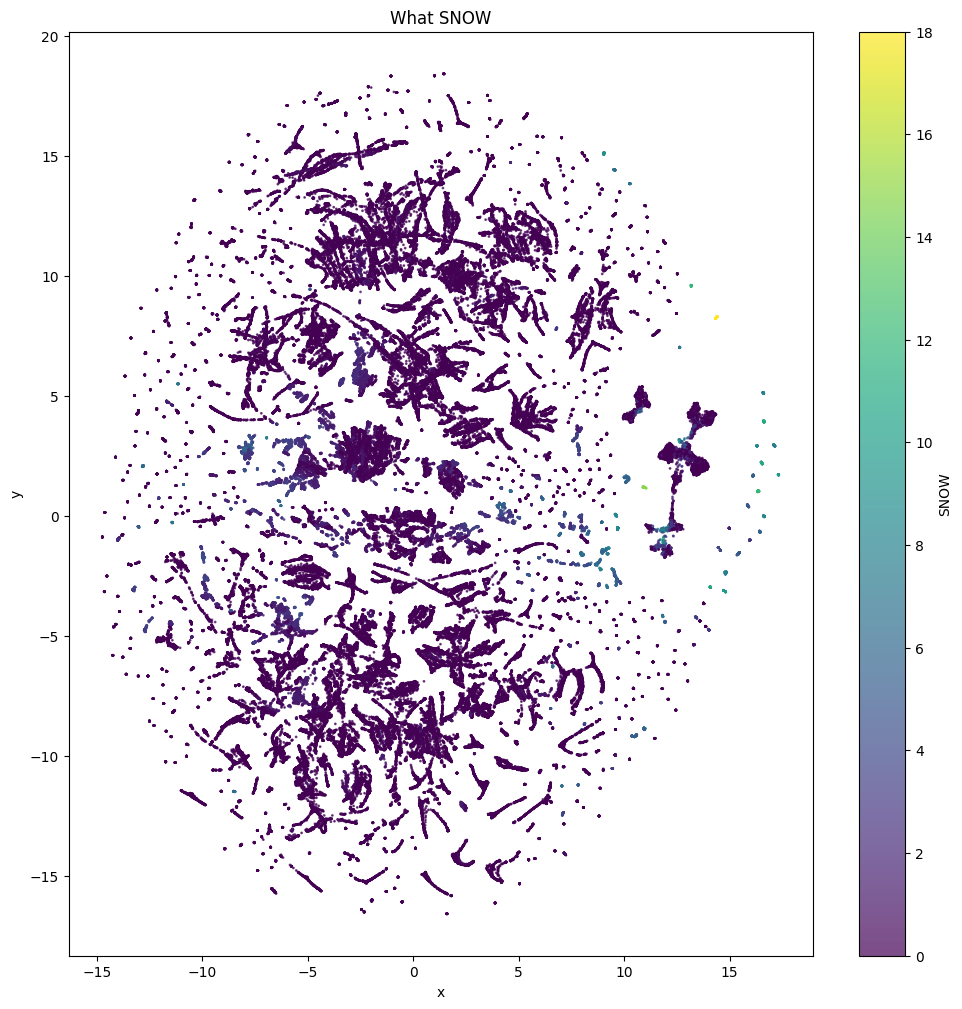

In [44]:
what_SNOW = traffic_data['SNOW']

plt.figure(figsize=(12,12))
scatter_SNOW = plt.scatter(help_data[:,0], help_data[:,1],c=what_SNOW, s=1, alpha=0.7)
plt.colorbar(scatter_SNOW, label='SNOW')
plt.title(f"What SNOW")
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

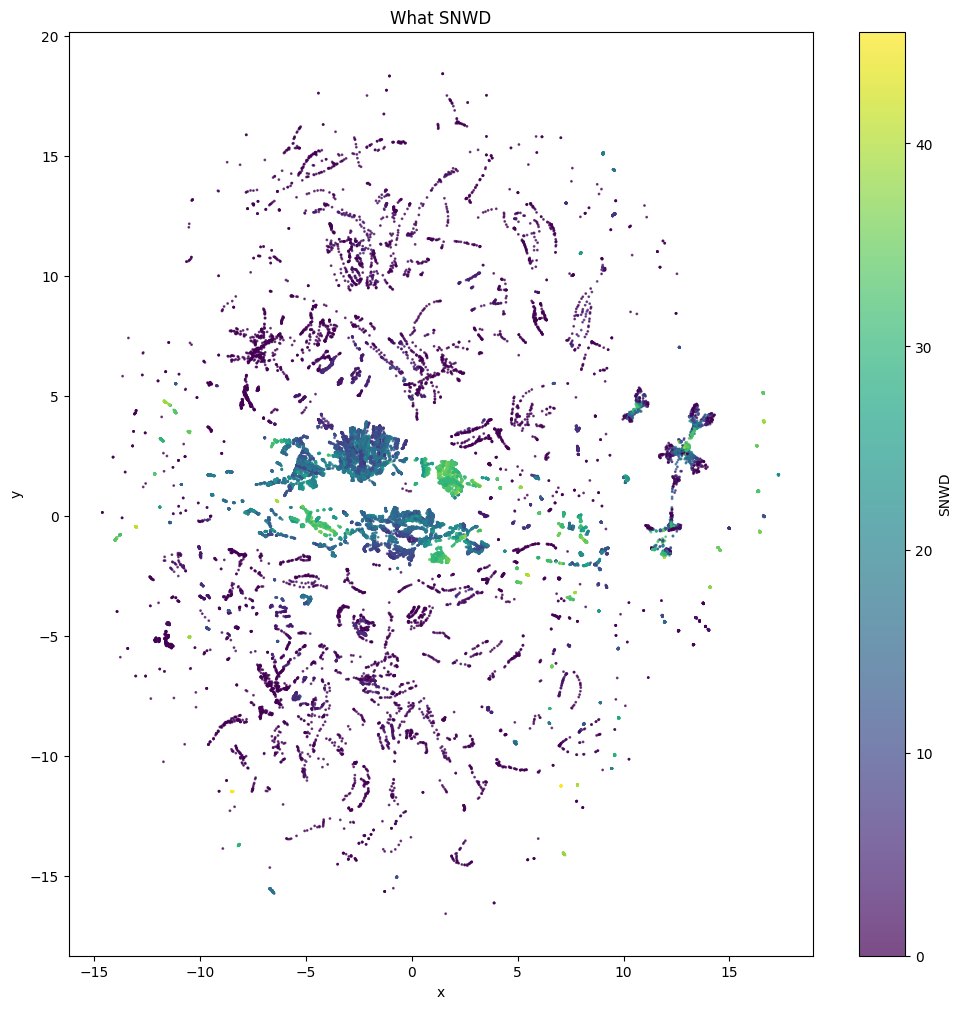

In [45]:
what_SNWD = traffic_data['SNWD']

plt.figure(figsize=(12,12))
scatter_SNWD = plt.scatter(help_data[:,0], help_data[:,1],c=what_SNWD, s=1, alpha=0.7)
plt.colorbar(scatter_SNWD, label='SNWD')
plt.title(f"What SNWD")
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

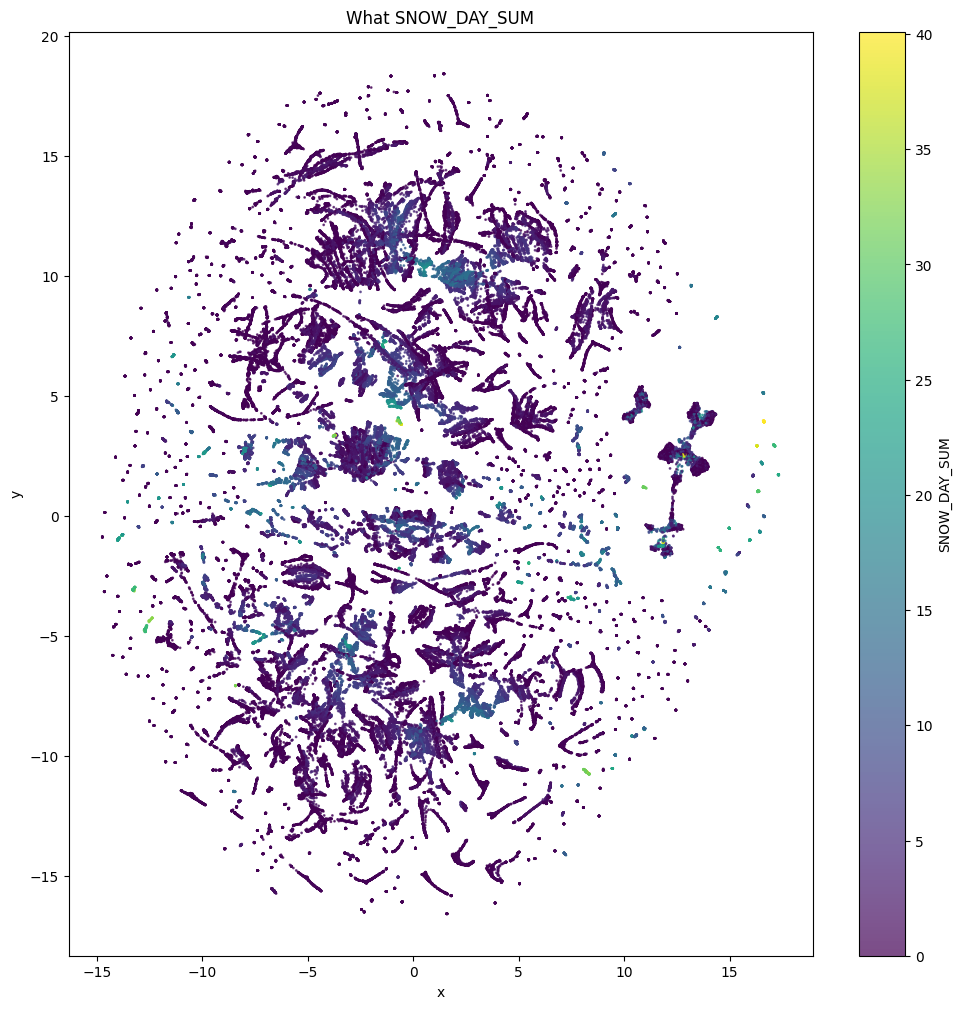

In [ ]:
what_SNOW_DAY_SUM = traffic_data['SNOW_DAY_SUM']

plt.figure(figsize=(12,12))
scatter_SNOW_DAY_SUM = plt.scatter(help_data[:,0], help_data[:,1],c=what_SNOW_DAY_SUM, s=1, alpha=0.7)
plt.colorbar(scatter_SNOW_DAY_SUM, label='SNOW_DAY_SUM')
plt.title(f"What SNOW_DAY_SUM")
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

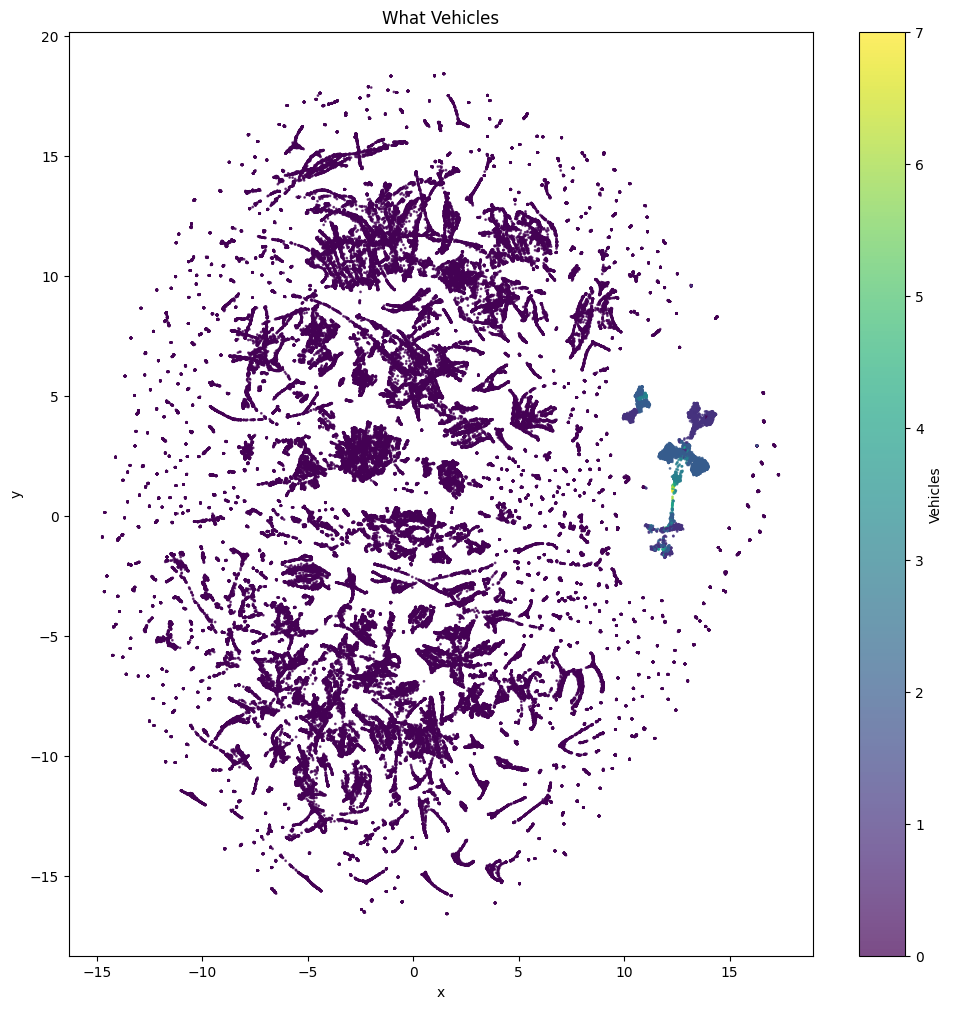

In [49]:
# Vehicles	Driver Age	Condition_Code	MorF	DayOfWeek

what_Vehicles = traffic_data['Vehicles']
what_Vehicles = what_Vehicles.map(lambda x: 7 if x > 7 else x)

plt.figure(figsize=(12,12))
scatter_Vehicles = plt.scatter(help_data[:,0], help_data[:,1],c=what_Vehicles, s=1, alpha=0.7)
plt.colorbar(scatter_Vehicles, label='Vehicles')
plt.title(f"What Vehicles")
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

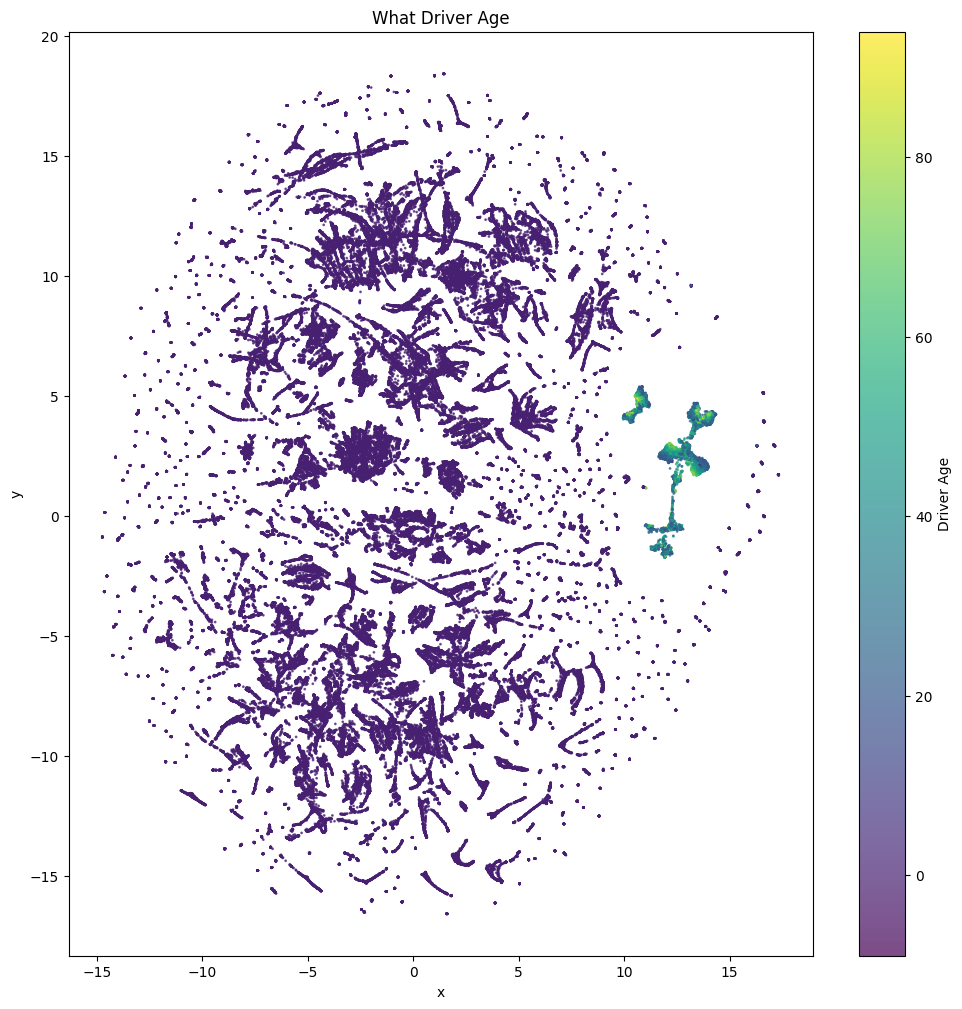

In [50]:
# Driver Age	Condition_Code	MorF	DayOfWeek

what_Driver_Age = traffic_data['Driver Age']

plt.figure(figsize=(12,12))
scatter_Driver_Age = plt.scatter(help_data[:,0], help_data[:,1],c=what_Driver_Age, s=1, alpha=0.7)
plt.colorbar(scatter_Driver_Age, label='Driver Age')
plt.title(f"What Driver Age")
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

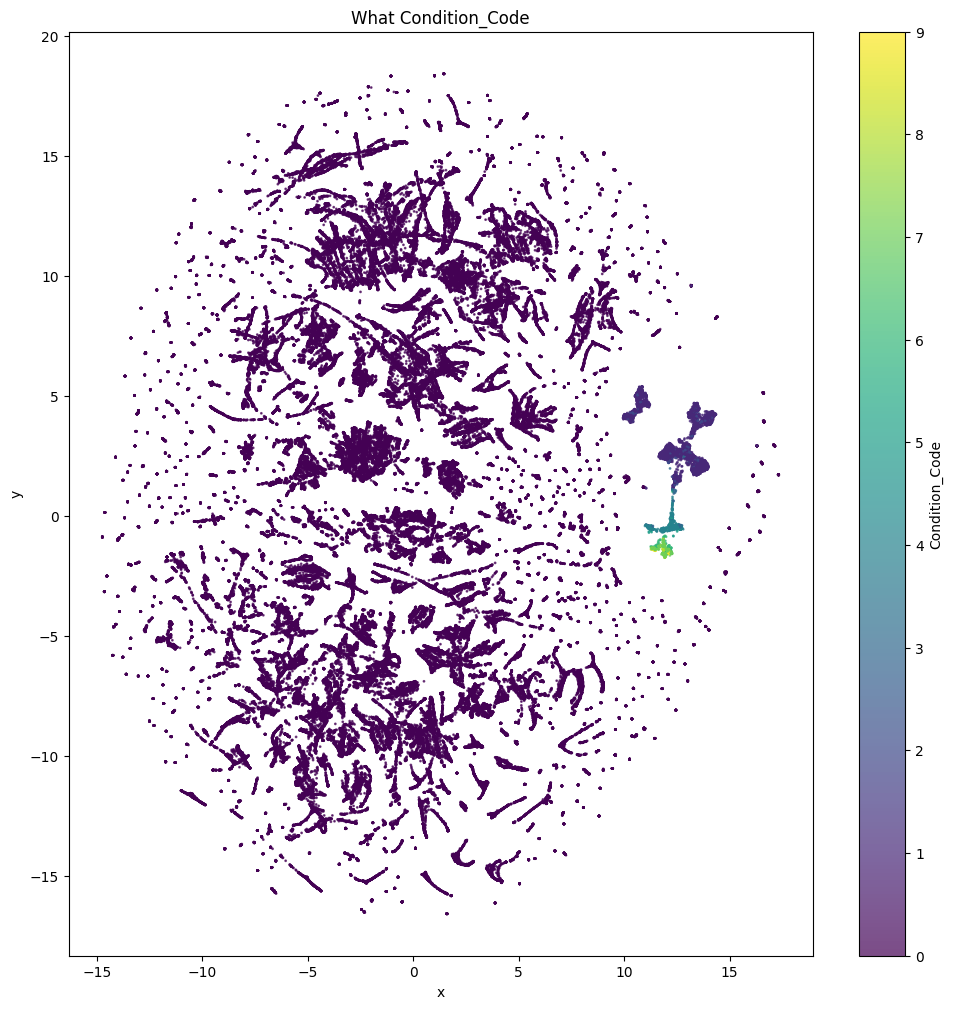

In [51]:
# MorF	DayOfWeek

what_Condition_Code = traffic_data['Condition_Code']

plt.figure(figsize=(12,12))
scatter_Condition_Code = plt.scatter(help_data[:,0], help_data[:,1],c=what_Condition_Code, s=1, alpha=0.7)
plt.colorbar(scatter_Condition_Code, label='Condition_Code')
plt.title(f"What Condition_Code")
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

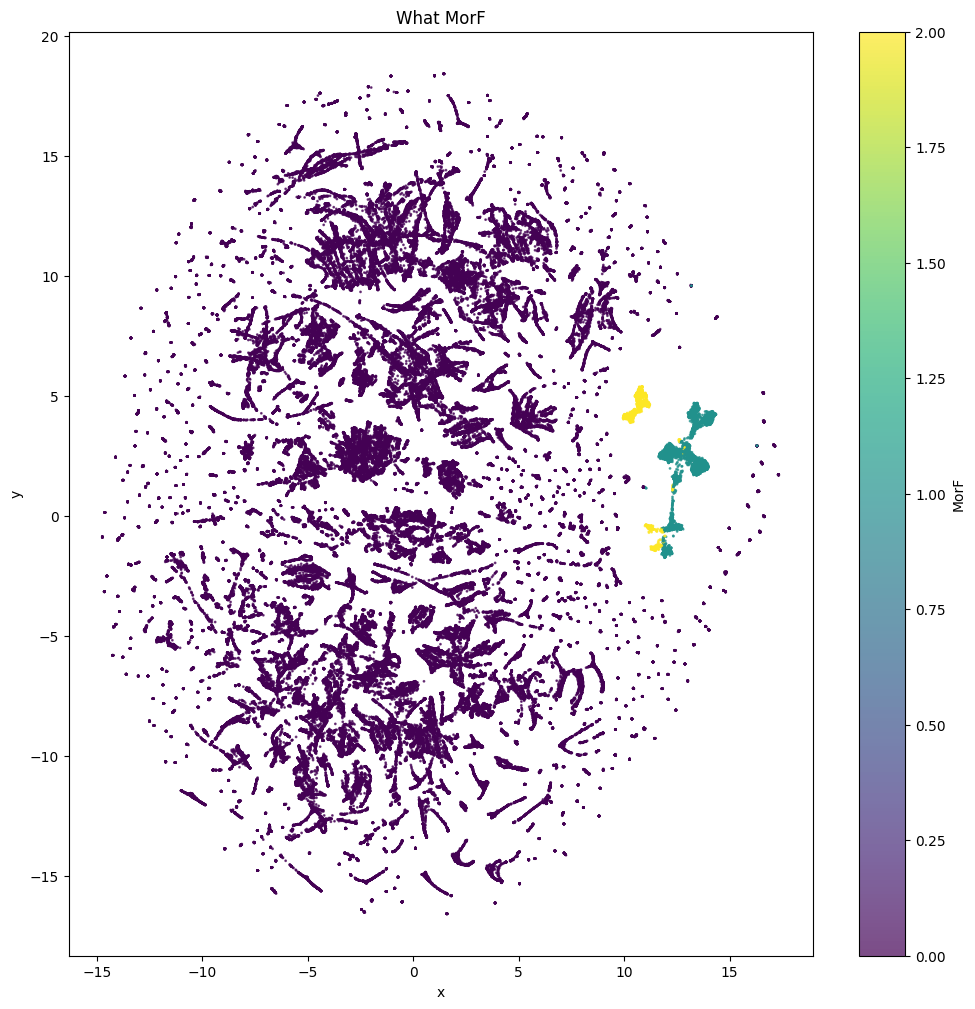

In [52]:
# MorF	DayOfWeek

what_MorF = traffic_data['MorF']

plt.figure(figsize=(12,12))
scatter_MorF = plt.scatter(help_data[:,0], help_data[:,1],c=what_MorF, s=1, alpha=0.7)
plt.colorbar(scatter_MorF, label='MorF')
plt.title(f"What MorF")
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

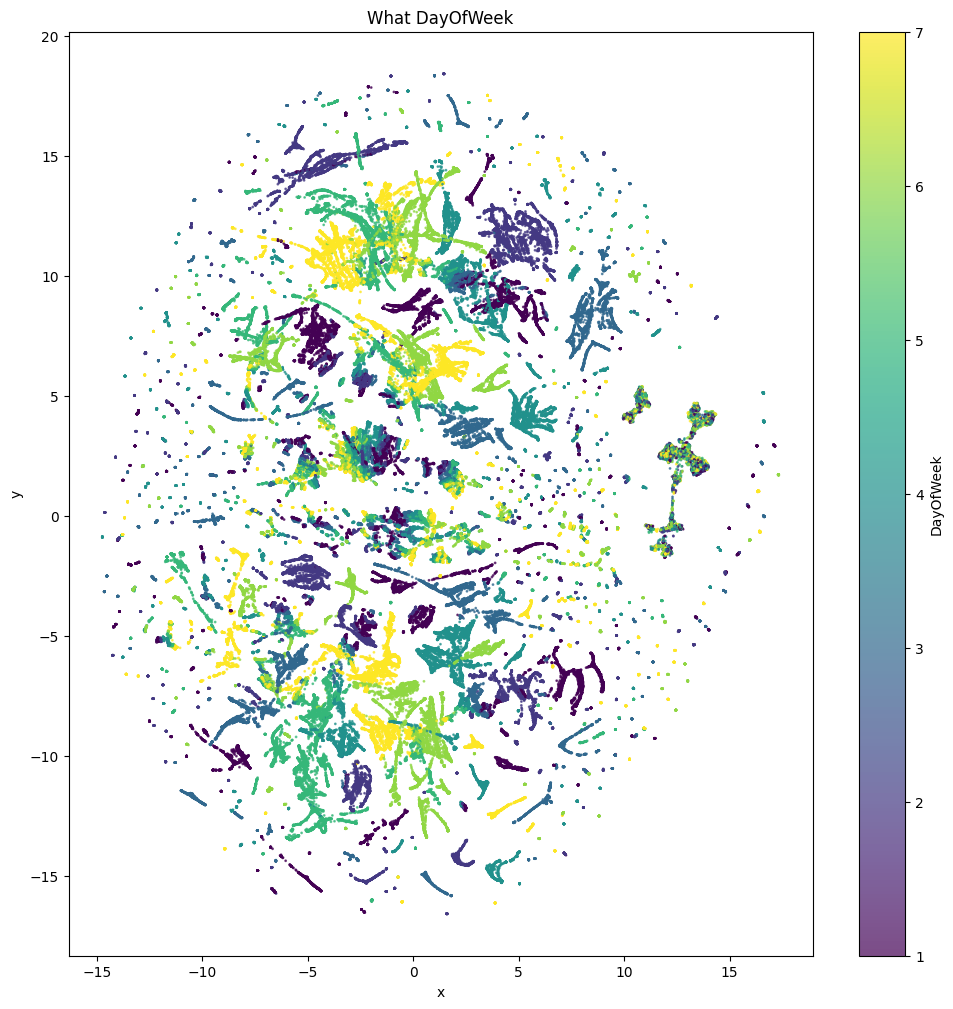

In [53]:
what_DayOfWeek = traffic_data['DayOfWeek']

plt.figure(figsize=(12,12))
scatter_DayOfWeek = plt.scatter(help_data[:,0], help_data[:,1],c=what_DayOfWeek, s=1, alpha=0.7)
plt.colorbar(scatter_DayOfWeek, label='DayOfWeek')
plt.title(f"What DayOfWeek")
plt.xlabel("x")
plt.ylabel("y")

In [60]:
df = traffic_data.drop(columns={'Date'})
filename = 'traffic_data'
stat = traffic_data.describe().to_csv('traffic_data_stats.csv')

In [4]:
testing_data_frame = traffic_data.drop(columns={'Date'})
testing_data_frame = testing_data_frame.describe().iloc[:,1:]
testing_data_frame

Time        TRAFFIC           PRCP           SNOW  \
count  167296.00000  167296.000000  153574.000000  153718.000000   
mean       11.50520    1065.531053       0.039158       0.426819   
std         6.91537     900.744524       0.105441       1.261246   
min         0.00000       0.000000       0.000000       0.000000   
25%         6.00000     253.000000       0.000000       0.000000   
50%        12.00000     888.000000       0.000000       0.000000   
75%        17.00000    1623.000000       0.020000       0.000000   
max        23.00000    9317.000000       1.210000      18.000000   

               SNWD   SNOW_DAY_SUM       Vehicles     Driver Age  \
count  35950.000000  153718.000000  167296.000000  167296.000000   
mean      14.693474       3.063753       0.099554       2.211350   
std       11.540372       4.769888       0.447734       9.743659   
min        0.000000       0.000000       0.000000      -9.000000   
25%        3.000000       0.000000       0.000000       0.000000   
50%       14.500000       1.000000       0.000000       0.000000   
75%       21.500000       4.500000       0.000000       0.000000   
max       45.500000      40.100000      28.000000      94.000000   

       Condition_Code           MorF      DayOfWeek  
count   167296.000000  167296.000000  167296.000000  
mean         0.118909       0.073194       4.016557  
std          0.678479       0.314096       1.993942  
min          0.000000       0.000000       1.000000  
25%          0.000000       0.000000       2.000000  
50%          0.000000       0.000000       4.000000  
75%          0.000000       0.000000       6.000000  
max          9.000000       2.000000       7.000000

In [ ]:
# model = LinearRegression()
# model.fit(traffic_data)

# for filename in os.listdir('clusters'):
#     file_path = os.path.join('clusters', filename)
#     df = pd.read_csv(file_path)
#     df = df.drop(columns={'Date'})
#     df.describe().iloc[:,1:]
#     df.fillna(0)
# df  


TypeError: LinearRegression.fit() missing 1 required positional argument: 'y'